Enter Grid Size: The Number of Squares Along One Side of a Square Grid10
The Size of the Hypothetical Spatial System is 10 Zones by 10 Zones, Making 100 in All

Enter the Parameter Value on Distance - beta - that You Think Best Fits the Data2

Zone 	 ObsO 	 ObsD 	 PredO 	 PredD

1 	 8.63 	 7.36 	 4.38 	 4.10
2 	 9.21 	 8.55 	 6.48 	 6.23
3 	 9.01 	 9.61 	 7.02 	 7.34
4 	 9.38 	 8.74 	 7.18 	 6.75
5 	 10.77 	 7.87 	 8.27 	 6.30
6 	 9.83 	 10.33 	 7.79 	 8.09
7 	 8.64 	 9.11 	 6.65 	 6.70
8 	 9.01 	 9.38 	 6.86 	 6.68
9 	 7.62 	 9.23 	 5.42 	 5.91
10 	 6.67 	 7.51 	 3.35 	 3.53
11 	 9.31 	 8.56 	 6.45 	 6.21
12 	 9.52 	 9.54 	 9.15 	 9.18
13 	 10.49 	 11.31 	 11.16 	 11.65
14 	 8.13 	 9.64 	 8.56 	 9.61
15 	 8.10 	 12.59 	 8.81 	 12.46
16 	 9.76 	 9.22 	 10.15 	 9.16
17 	 8.54 	 9.04 	 8.49 	 8.62
18 	 8.98 	 9.62 	 8.88 	 9.05
19 	 9.00 	 10.23 	 8.36 	 9.00
20 	 8.64 	 7.23 	 5.58 	 4.86
21 	 8.43 	 8.58 	 6.32 	 6.47
22 	 9.86 	 10.72 	 10.38 	 11.08
23 	 11.42 	 11.22 	 13.09 	 12.92

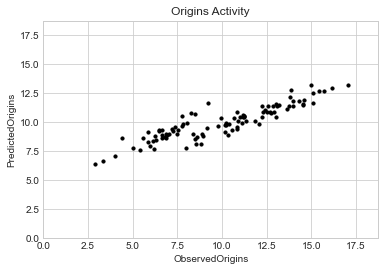


Correlation  	 0.902


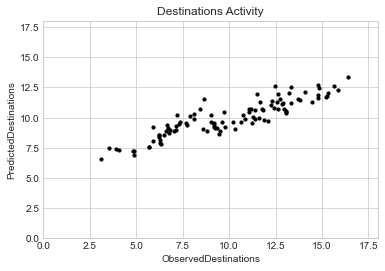


Correlation  	 0.624


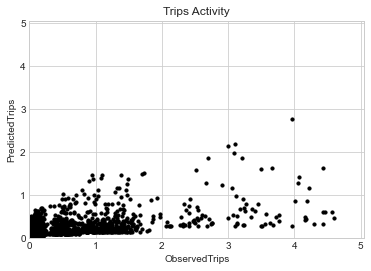

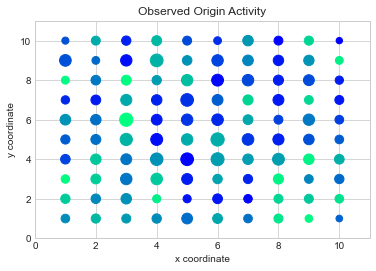

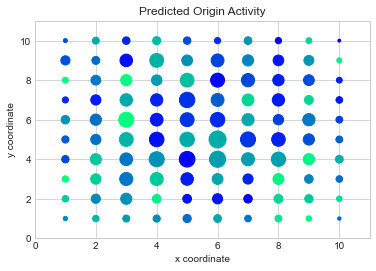

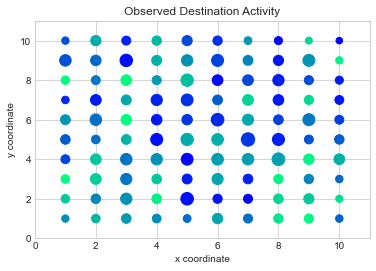

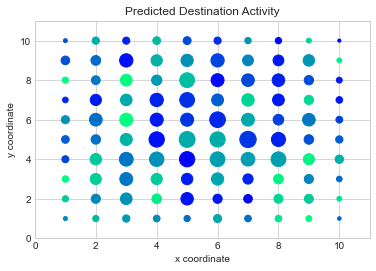

The model and its outputs are now complete



In [1]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random
import numpy as np
plt.style.use('seaborn-whitegrid')

#Defined Functions: for Plotting observed and Predicted Model Results on the Grid, 
#the Friction of Distance Parameter, and the Location-Interactions Plots for Correlations

def friction(parameter,dis):
    frict=math.exp(parameter*dis)
    return frict

def locintplot(obs,pred,activities):
    maxo=np.max(obs); maxop=np.max(pred)
    if maxo>maxop:
        maxv=maxo
    else:
        maxv=maxop
    maxv=maxv*(1.1)
    plt.axis([0,maxv,0,maxv])
    plt.xlabel("Observed" + activities)
    plt.ylabel("Predicted" + activities)
    plt.title(activities + " Activity")
    plt.scatter(pred, obs, s=10,c='black')
    rO = np.corrcoef(pred, obs)
    print("Correlation ","\t","{:.3f}".format(rO[0,1]))
    return

def scattergraph(soutput,dataname):
    plt.show()
    sizes=soutput**2
    plt.axis([0,n,0,n])
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")
    plt.title(dataname + ' Activity')
    plt.scatter(xcoord, ycoord, c=colors, s=sizes, alpha=1.0,cmap='winter')
    return

#Defining the Hypothetical Spatial System

xcoord=np.array([])
ycoord=np.array([])

n=input("Enter Grid Size: The Number of Squares Along One Side of a Square Grid")
n=int(n); N=n*n
print("The Size of the Hypothetical Spatial System is",n, "Zones by", n,"Zones, Making", N,"in All")
print()

distance=np.full((N,N), 1.0)

n=n+1
for y in range(1,n):
    for x in range(1,n):
        xcoord = np.append(xcoord,[x]) 
        ycoord = np.append(ycoord,[y])

ij=0
for i in range (0,N):
    xi=xcoord[i]
    yi=ycoord[i]
    for j in range (0,N):
        ij=ij+1
        xj=xcoord[j]
        yj=ycoord[j]
        dis=math.sqrt((((xi-xj)**2)+((yi-yj)**2)))
        distance[i][j]=dis
        if distance[i][j]==0:
            distance[i][j]=0.5
        #print(i+1,j+1,distance[i][j])

#Defining the Hypothetical Trip, Origin and Destination Data

tobs=np.full((N,N), 1.0)
origins=np.full((N),1.0)
destinations=np.full((N),1.0)

for i in range (0,N):
    for j in range (0,N):
        tobs[i][j]=1.0/(distance[i][j]*(0.1+random.rand()))
Tobs = np.sum(tobs)
for i in range (0,N):
    for j in range(0,N):
        ij=ij+1
        tobs[i,j]=1000*(tobs[i][j]/Tobs)

origins = np.sum(tobs, axis = 1)
destinations = np.sum(tobs, axis = 0)

To=np.sum(origins) 
Td=np.sum(destinations)
Tobs = np.sum(tobs)

#Running the Model

beta=input("Enter the Parameter Value on Distance - beta - that You Think Best Fits the Data")
beta=float(beta)
print()
trips=np.full((N,N),1.0)
OPred=np.full((N),1.0)
DPred=np.full((N), 1.0)

total=1000
for i in range(0,N):
    for j in range(0,N):
        trips[i][j]=origins[i]*destinations[j]/(friction(beta, distance[i][j]))
Ttrip = np.sum(trips)
for i in range(0,N):
    for j in range(0,N):
        trips[i][j]=total*((origins[i]*destinations[j])/(friction(beta, distance[i][j])))/Ttrip
sum=0.0;sum1=0.0
for i in range(0,N):
    for j in range(0,N):
        sum=sum+tobs[i][j]
        sum1=sum1+trips[i][j]  

#Printing the Predictions

OPred = np.sum(trips, axis = 1)
DPred = np.sum(trips, axis = 0)

print("Zone","\t","ObsO","\t","ObsD","\t","PredO","\t","PredD")
print()
for i in range(0,N):
    print(i+1, "\t","{:.2f}".format(origins[i]), "\t","{:.2f}".format(destinations[i]),"\t","{:.2f}".format(OPred[i]),"\t","{:.2f}".format(DPred[i]))

#Comparing Observed with Predicted Origin Activity Using Scattergraphs

input()
locintplot(origins, OPred, 'Origins')
plt.savefig('OriginOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

input()
locintplot(destinations, DPred, 'Destinations')
plt.savefig('DestOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

input()
locintplot(tobs, trips, 'Trips')
plt.savefig('TripOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

rng = np.random.RandomState(0)
colors = rng.rand(N)

#Plotting Observed and Predicted Locations on the Hypothetical Grid

input()
scattergraph(origins, 'Observed Origin')
plt.savefig('ObsOrigins.png', dpi=300, bbox_inches='tight')
plt.show()

input()
scattergraph(OPred, 'Predicted Origin')
plt.savefig('PredOrigins.png', dpi=300, bbox_inches='tight')
plt.show()

input()
scattergraph(destinations, 'Observed Destination')
plt.savefig('ObsDestinations.png', dpi=300, bbox_inches='tight')
plt.show()

input()
scattergraph(DPred, 'Predicted Destination')
plt.savefig('PredDestinations.png', dpi=300, bbox_inches='tight')
plt.show()



print("The model and its outputs are now complete")
print()



   
